# Submission Proyek Akhir Kelas "Belajar Machine Learning untuk Pemula" Dicoding
## Nama : Naufal Aldy Pradana
## Domisili : Kota Semarang, Jawa Tengah
## Email : blitzaldykazu@gmail.com

In [60]:
# Import essential libraries

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, zipfile, shutil
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from matplotlib import pyplot as plt

In [3]:
# Import rock paper scissors dataset from dicoding
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-19 21:16:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.59MB/s    in 4m 15s  

2021-04-19 21:20:22 (1.21 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [8]:
# Extract dataset

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [9]:
# Create new directory train and val directory + split train and test dataset
base_dir = '/tmp/rockpaperscissors'
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

# Initiate train and validation path in base dir
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir, 'val')

# Initiate rock, paper, and scissors path in base dir
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [10]:
# Create train and validation directory
os.mkdir(train_dir)
os.mkdir(val_dir)

In [11]:
# Initiate each rock, paper, and scissors train inside train dir
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
 
# Initiate each rock, paper, and scissors val inside val dir
val_rock = os.path.join(val_dir, 'rock')
val_paper = os.path.join(val_dir, 'paper')
val_scissors = os.path.join(val_dir, 'scissors')

In [12]:
# Create
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [13]:
# Split data train and validation set by 60% and 40%
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), train_size= 0.6)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), train_size= 0.6)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), train_size= 0.6)

In [14]:
# Copy file from original dir to train and val dir
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [15]:
# Generate image data
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [40]:
train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=82
)

validation_generator = validation_datagen.flow_from_directory(
	val_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=82
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [35]:
# Initialite model
model = tf.keras.models.Sequential([
                                    
    # This is the first convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolutional layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fourth convolutional layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
# Compile model with rmsprop optimizer
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

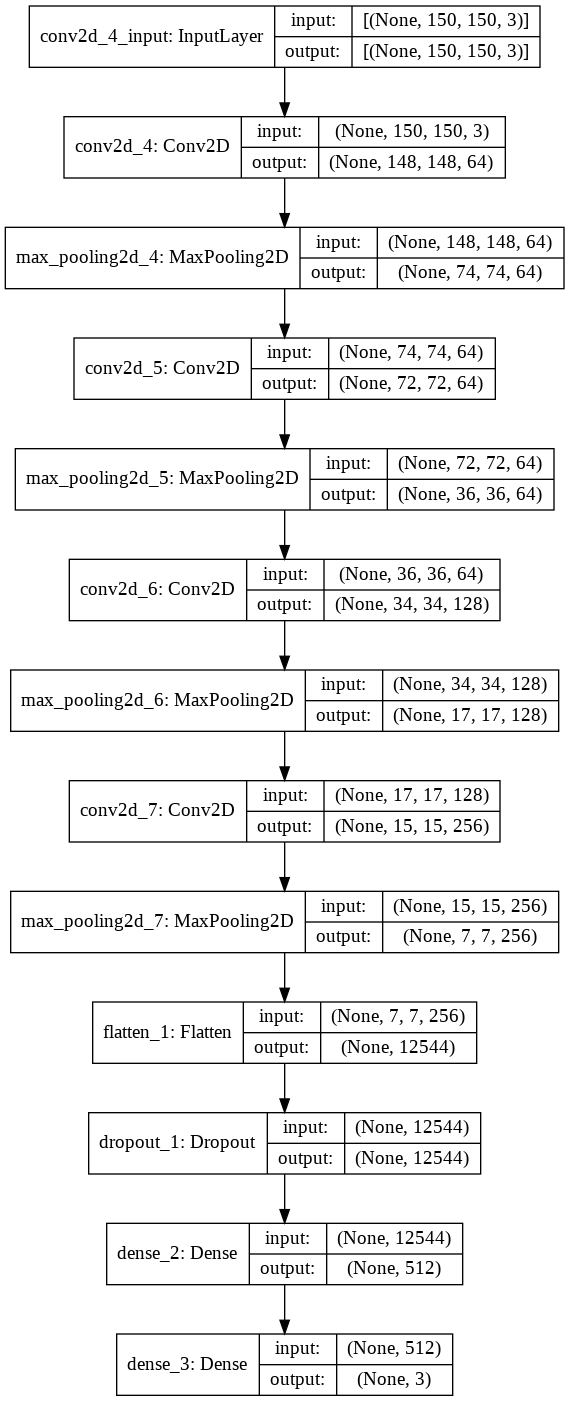

In [34]:
# Plot model
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [41]:
# Initiate callbacks
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, mode='auto', verbose=1)
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, verbose=1, mode='auto', cooldown=1)

# Train Model
history = model.fit(
    train_generator,
    steps_per_epoch = 16,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 11, 
    verbose =2,
    callbacks=[earlystop, reduce]
)

Epoch 1/10
16/16 - 95s - loss: 0.1432 - accuracy: 0.9581 - val_loss: 0.0631 - val_accuracy: 0.9840
Epoch 2/10
16/16 - 95s - loss: 0.1729 - accuracy: 0.9550 - val_loss: 0.0969 - val_accuracy: 0.9737
Epoch 3/10
16/16 - 95s - loss: 0.1458 - accuracy: 0.9558 - val_loss: 0.0620 - val_accuracy: 0.9817
Epoch 4/10
16/16 - 95s - loss: 0.1542 - accuracy: 0.9474 - val_loss: 0.0873 - val_accuracy: 0.9737
Epoch 5/10
16/16 - 95s - loss: 0.0977 - accuracy: 0.9688 - val_loss: 0.0467 - val_accuracy: 0.9863
Epoch 6/10
16/16 - 95s - loss: 0.1122 - accuracy: 0.9581 - val_loss: 0.0506 - val_accuracy: 0.9874
Epoch 7/10
16/16 - 95s - loss: 0.0862 - accuracy: 0.9726 - val_loss: 0.0420 - val_accuracy: 0.9886
Epoch 8/10
16/16 - 94s - loss: 0.1560 - accuracy: 0.9543 - val_loss: 0.0618 - val_accuracy: 0.9829
Epoch 9/10
16/16 - 95s - loss: 0.0936 - accuracy: 0.9748 - val_loss: 0.0522 - val_accuracy: 0.9874
Epoch 00009: early stopping


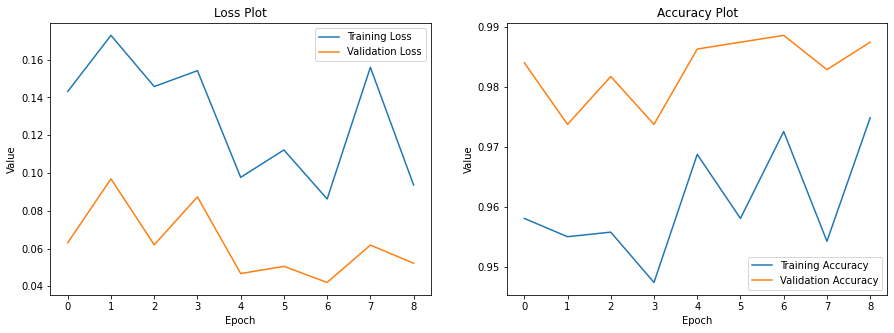

In [64]:
#Plot accuracy amd loss during the training and validation
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving 5VvYOvnkxKc8PIog.png to 5VvYOvnkxKc8PIog.png
5VvYOvnkxKc8PIog.png
Result : Scissor


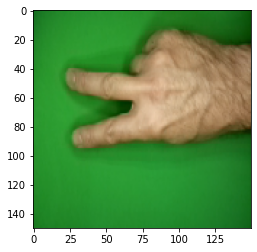

In [46]:
#main driver
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predictionResult = model.predict(images, batch_size=10)

  print(fn)
  if predictionResult[0,0]!=0:
    print('Result : Paper')
  elif predictionResult[0,1]!=0:
    print('Result : Rock')
  else:
    print('Result : Scissor')